In [284]:
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import winprobabilitypbp
from nba_api.stats.endpoints import boxscoreusagev2
from nba_api.stats.endpoints import boxscorescoringv2
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
pd.set_option('display.max_colwidth',250)
pd.set_option('display.max_columns', None)

# Inspiration

On March 24, 2017, 18,624 fans at the Garden and many more at home got to see a 20 year old Devin Booker light up the Garden for 70 points -- a mark that has been reached by 2 other players. Those other two are David Robinson and Kobe Bryant, both of which are revered as all-time greats. The other two teams were able to pull off wins with their great efforts, but Booker fell short. And that really is the narrative surrounding Booker for the past 3/4 years. 

He is a great scorer, the kid gets buckets, but the team doesn't win. This is a look at how this 70 point game differs from other 60+ games.

In [32]:
game = leaguegamefinder.LeagueGameFinder(player_or_team_abbreviation = "P", league_id_nullable = "00", \
                                        gt_pts_nullable = "60", season_type_nullable = "Regular Season")
df = game.get_data_frames()[0]
df

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22018,201935,James Harden,1610612745,HOU,Houston Rockets,0021801084,2019-03-22,HOU vs. SAS,W,37,61,19,34,0.559,9,13,0.692,14,17,0.824,2,5,7,1,3,0,3,3,18.0
1,22018,201935,James Harden,1610612745,HOU,Houston Rockets,0021800710,2019-01-23,HOU @ NYK,W,40,61,17,38,0.447,5,20,0.250,22,25,0.880,6,9,15,4,5,0,5,3,19.0
2,22018,202689,Kemba Walker,1610612766,CHA,Charlotte Hornets,0021800225,2018-11-17,CHA vs. PHI,L,45,60,21,34,0.618,6,14,0.429,12,12,1.000,0,7,7,4,4,0,9,2,1.0
3,22017,201935,James Harden,1610612745,HOU,Houston Rockets,0021700748,2018-01-30,HOU vs. ORL,W,46,60,19,30,0.633,5,14,0.357,17,18,0.944,2,8,10,11,4,1,5,2,7.0
4,22016,1626164,Devin Booker,1610612756,PHX,Phoenix Suns,0021601076,2017-03-24,PHX @ BOS,L,45,70,21,40,0.525,4,11,0.364,24,26,0.923,2,6,8,6,3,1,5,3,-6.0
5,22016,202691,Klay Thompson,1610612744,GSW,Golden State Warriors,0021600314,2016-12-05,GSW vs. IND,W,29,60,21,33,0.636,8,14,0.571,10,11,0.909,0,2,2,1,0,0,0,0,37.0
6,22015,977,Kobe Bryant,1610612747,LAL,Los Angeles Lakers,0021501228,2016-04-13,LAL vs. UTA,W,42,60,22,50,0.440,6,21,0.286,10,12,0.833,0,4,4,4,1,1,2,1,7.0
7,22013,2544,LeBron James,1610612748,MIA,Miami Heat,0021300893,2014-03-03,MIA vs. CHA,W,41,61,22,33,0.667,8,10,0.800,9,12,0.750,3,4,7,4,0,0,2,2,16.0
8,22013,2546,Carmelo Anthony,1610612752,NYK,New York Knicks,0021300640,2014-01-24,NYK vs. CHA,W,39,62,23,35,0.657,6,11,0.545,10,10,1.000,1,12,13,0,0,0,0,1,34.0
9,22008,977,Kobe Bryant,1610612747,LAL,Los Angeles Lakers,0020800709,2009-02-02,LAL @ NYK,W,37,61,19,31,0.613,3,6,0.500,20,20,1.000,0,0,0,3,0,1,2,1,19.0


# Win/Loss Stats

In [44]:
Players = df.PLAYER_NAME.value_counts()
Players

Kobe Bryant         6
Michael Jordan      4
James Harden        3
Gilbert Arenas      1
Allen Iverson       1
Kemba Walker        1
Karl Malone         1
Larry Bird          1
David Robinson      1
Klay Thompson       1
Carmelo Anthony     1
Tracy McGrady       1
LeBron James        1
Tom Chambers        1
Devin Booker        1
Shaquille O'Neal    1
Bernard King        1
Name: PLAYER_NAME, dtype: int64

In [40]:
Dubs = df.WL.value_counts()
WinPct = Dubs[0] / len(df)
WinPct

0.8148148148148148

In [76]:
WinLossRatio = Dubs[0]/Dubs[1]
WinLossRatio

4.4

It isn't too surprising to see Devin Booker is in the minority here. Since the 1983-84 season, there have been 27 games where a player has scored 60+ points. The winning team has won 22 of the 27 games for a win ratio of 4.4:1 and a winning percentage of 81%. 

# Comparison against others

In [140]:
print(df.FG_PCT.rank(ascending = False, method = 'min')[4])
df['z_score_fgpct'] = (df.FG_PCT - df.FG_PCT.mean()) / df.FG_PCT.std()
df.loc[df.PLAYER_NAME == 'Devin Booker', ['PLAYER_NAME','z_score_fgpct']]

24.0


,PLAYER_NAME,z_score_fgpct
4,Devin Booker,-0.878703


In [151]:
df['FG3Pt_Pct'] = df.FG3A/df.FGA
df.loc[:, ['PLAYER_NAME','3Pt_Pct']]
print(df.FG3Pt_Pct.rank()[4])
df.loc[df.PLAYER_NAME == 'Devin Booker', ['PLAYER_NAME','FG3Pt_Pct']]

14.0


,PLAYER_NAME,FG3Pt_Pct
4,Devin Booker,0.275


In [118]:
print(df.FTM.min())
df.sort_values(by='FTM', ascending = False).head(5)

9


,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,FG3Pt_Pct,z_score_3pct
4,22016,1626164,Devin Booker,1610612756,PHX,Phoenix Suns,0021601076,2017-03-24,PHX @ BOS,L,45,70,21,40,0.525,4,11,0.364,24,26,0.923,2,6,8,6,3,1,5,3,-6.0,0.275000,0.270272
15,22004,947,Allen Iverson,1610612755,PHI,Philadelphia 76ers,0020400742,2005-02-12,PHI vs. ORL,W,42,60,17,36,0.472,2,5,0.400,24,27,0.889,1,3,4,6,5,1,3,1,27.0,0.138889,-0.550316
26,21984,77264,Bernard King,1610612752,NYK,New York Knicks,0028400327,1984-12-25,NYK vs. NJN,L,41,60,19,30,0.633,0,0,NaN,22,26,0.846,2,5,7,4,0,0,5,2,NaN,0.000000,-1.387652
14,22005,977,Kobe Bryant,1610612747,LAL,Los Angeles Lakers,0020500359,2005-12-20,LAL vs. DAL,W,33,62,18,31,0.581,4,10,0.400,22,25,0.880,3,5,8,0,3,0,2,3,35.0,0.322581,0.557127
1,22018,201935,James Harden,1610612745,HOU,Houston Rockets,0021800710,2019-01-23,HOU @ NYK,W,40,61,17,38,0.447,5,20,0.250,22,25,0.880,6,9,15,4,5,0,5,3,19.0,0.526316,1.785409


In [114]:
print(df.FGA.min())
df.sort_values(by='FGA', ascending = False).head(5)

26


,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,FG3Pt_Pct,z_score_3pct
6,22015,977,Kobe Bryant,1610612747,LAL,Los Angeles Lakers,0021501228,2016-04-13,LAL vs. UTA,W,42,60,22,50,0.440,6,21,0.286,10,12,0.833,0,4,4,4,1,1,2,1,7.0,0.420000,1.144451
19,21992,893,Michael Jordan,1610612741,CHI,Chicago Bulls,0029200453,1993-01-16,CHI vs. ORL,L,47,64,27,49,0.551,1,5,0.200,9,11,0.818,4,2,6,1,5,0,2,5,NaN,0.102041,-0.772466
13,22005,977,Kobe Bryant,1610612747,LAL,Los Angeles Lakers,0020500591,2006-01-22,LAL vs. TOR,W,42,81,28,46,0.609,7,13,0.538,18,20,0.900,2,4,6,2,3,1,3,1,25.0,0.282609,0.316144
18,21993,764,David Robinson,1610612759,SAN,San Antonio Spurs,0029301097,1994-04-24,SAN @ LAC,W,44,71,26,41,0.634,1,2,0.500,18,25,0.720,4,10,14,5,0,2,8,2,NaN,0.048780,-1.093563
4,22016,1626164,Devin Booker,1610612756,PHX,Phoenix Suns,0021601076,2017-03-24,PHX @ BOS,L,45,70,21,40,0.525,4,11,0.364,24,26,0.923,2,6,8,6,3,1,5,3,-6.0,0.275000,0.270272


In [113]:
print(df.FG_PCT.min())
df.sort_values(by='FG_PCT').head(5)

0.44


,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,FG3Pt_Pct,z_score_3pct
6,22015,977,Kobe Bryant,1610612747,LAL,Los Angeles Lakers,0021501228,2016-04-13,LAL vs. UTA,W,42,60,22,50,0.440,6,21,0.286,10,12,0.833,0,4,4,4,1,1,2,1,7.0,0.420000,1.144451
1,22018,201935,James Harden,1610612745,HOU,Houston Rockets,0021800710,2019-01-23,HOU @ NYK,W,40,61,17,38,0.447,5,20,0.250,22,25,0.880,6,9,15,4,5,0,5,3,19.0,0.526316,1.785409
15,22004,947,Allen Iverson,1610612755,PHI,Philadelphia 76ers,0020400742,2005-02-12,PHI vs. ORL,W,42,60,17,36,0.472,2,5,0.400,24,27,0.889,1,3,4,6,5,1,3,1,27.0,0.138889,-0.550316
4,22016,1626164,Devin Booker,1610612756,PHX,Phoenix Suns,0021601076,2017-03-24,PHX @ BOS,L,45,70,21,40,0.525,4,11,0.364,24,26,0.923,2,6,8,6,3,1,5,3,-6.0,0.275000,0.270272
12,22006,2240,Gilbert Arenas,1610612764,WAS,Washington Wizards,0020600355,2006-12-17,WAS @ LAL,W,49,60,17,32,0.531,5,12,0.417,21,27,0.778,0,8,8,8,2,0,3,3,10.0,0.375000,0.873154


In [109]:
df.loc[df.PLUS_MINUS < 0]

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,z_score_fgpct,FG3Pt_Pct,z_score_3pct
4,22016,1626164,Devin Booker,1610612756,PHX,Phoenix Suns,0021601076,2017-03-24,PHX @ BOS,L,45,70,21,40,0.525,4,11,0.364,24,26,0.923,2,6,8,6,3,1,5,3,-6.0,-0.878703,0.275,0.270272


# Comparison against other losing teams

In [115]:
losers = df.loc[df.WL == 'L']
losers

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,FG3Pt_Pct,z_score_3pct
2,22018,202689,Kemba Walker,1610612766,CHA,Charlotte Hornets,0021800225,2018-11-17,CHA vs. PHI,L,45,60,21,34,0.618,6,14,0.429,12,12,1.000,0,7,7,4,4,0,9,2,1.0,0.411765,1.094802
4,22016,1626164,Devin Booker,1610612756,PHX,Phoenix Suns,0021601076,2017-03-24,PHX @ BOS,L,45,70,21,40,0.525,4,11,0.364,24,26,0.923,2,6,8,6,3,1,5,3,-6.0,0.275000,0.270272
19,21992,893,Michael Jordan,1610612741,CHI,Chicago Bulls,0029200453,1993-01-16,CHI vs. ORL,L,47,64,27,49,0.551,1,5,0.200,9,11,0.818,4,2,6,1,5,0,2,5,NaN,0.102041,-0.772466
23,21986,893,Michael Jordan,1610612741,CHI,Chicago Bulls,0028600921,1987-04-16,CHI vs. ATL,L,41,61,22,38,0.579,0,3,0.000,17,21,0.810,5,5,10,1,4,1,3,3,NaN,0.078947,-0.911693
26,21984,77264,Bernard King,1610612752,NYK,New York Knicks,0028400327,1984-12-25,NYK vs. NJN,L,41,60,19,30,0.633,0,0,NaN,22,26,0.846,2,5,7,4,0,0,5,2,NaN,0.000000,-1.387652


In [117]:
losers.PLAYER_ID.tolist()

[202689, 1626164, 893, 893, 77264]

In [152]:
losers['z_score_fgpct'] = (losers.FG_PCT - df.FG_PCT.mean()) / df.FG_PCT.std()
losers.loc[:, ['PLAYER_NAME','z_score_fgpct']]

,PLAYER_NAME,z_score_fgpct
2,Kemba Walker,0.306909
4,Devin Booker,-0.878703
19,Michael Jordan,-0.547242
23,Michael Jordan,-0.190283
26,Bernard King,0.498136


In [221]:
loser_gameids = losers.GAME_ID.tolist()
walker_winprob = winprobabilitypbp.WinProbabilityPBP(game_id=loser_gameids[0])
walker_winprob_df = walker_winprob.get_data_frames()[0]
walker_winprob_df.drop_duplicates(subset = 'SECONDS_REMAINING', keep = 'first', inplace = True)

booker_winprob = winprobabilitypbp.WinProbabilityPBP(game_id=loser_gameids[1])
booker_winprob_df = booker_winprob.get_data_frames()[0]
booker_winprob_df.drop_duplicates(subset = 'SECONDS_REMAINING', keep = 'first', inplace = True)

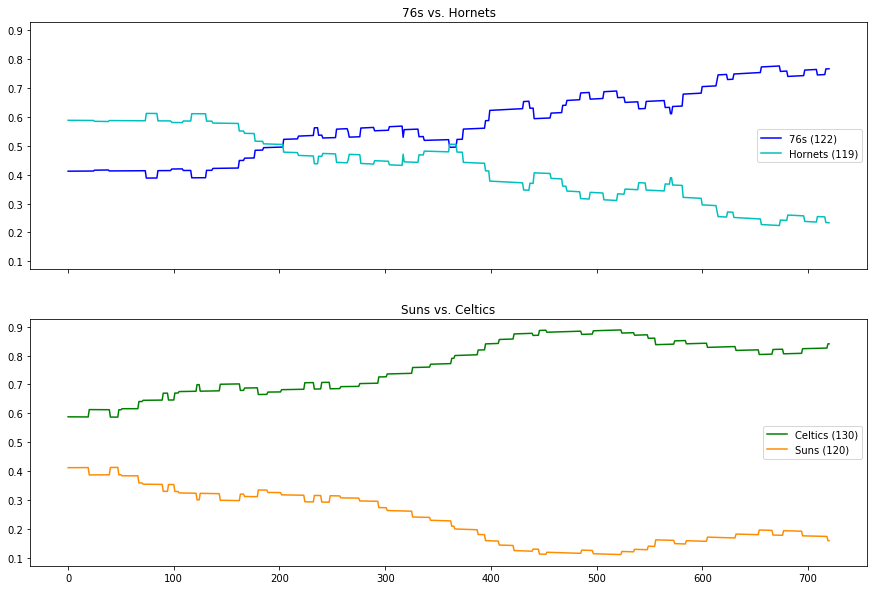

In [267]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10), sharex = True, sharey = True)

ax1.plot(walker_winprob_df.SECONDS_REMAINING.sort_values(ascending = True), walker_winprob_df.VISITOR_PCT, c = 'b', label = '76s (122)')
ax1.plot(walker_winprob_df.SECONDS_REMAINING.sort_values(ascending = True), walker_winprob_df.HOME_PCT, c = 'c', label = 'Hornets (119)')
ax1.set_title('76s vs. Hornets')
ax1.legend(loc = 'center right')

ax2.plot(booker_winprob_df.SECONDS_REMAINING.sort_values(ascending = True), booker_winprob_df.HOME_PCT, c = 'g', label = 'Celtics (130)')
ax2.plot(booker_winprob_df.SECONDS_REMAINING.sort_values(ascending = True), booker_winprob_df.VISITOR_PCT, c = 'darkorange', label = 'Suns (120)')
ax2.set_title('Suns vs. Celtics')
ax2.legend(loc = 'center right')

plt.show()

The Suns never had a great chance of winning their game while the Hornets actually came into the game as favorites. This is to show that Devin Booker's team falls short in every way.

In [291]:
walker_usage = boxscoreusagev2.BoxScoreUsageV2(game_id=loser_gameids[0])
book_usage = boxscoreusagev2.BoxScoreUsageV2(game_id=loser_gameids[1])
walker_shooting = boxscorescoringv2.BoxScoreScoringV2(game_id=loser_gameids[0])
booker_shooting = boxscorescoringv2.BoxScoreScoringV2(game_id=loser_gameids[1])

In [292]:
walker_usage_df = walker_usage.get_data_frames()[0]
book_usage_df = book_usage.get_data_frames()[0]
walker_usage_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,USG_PCT,PCT_FGM,PCT_FGA,PCT_FG3M,PCT_FG3A,PCT_FTM,PCT_FTA,PCT_OREB,PCT_DREB,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
0,0021800225,1610612755,PHI,Philadelphia,200755,JJ Redick,F,,29:32,0.241,0.360,0.340,0.625,0.550,0.000,0.000,0.000,0.037,0.033,0.071,0.000,0.000,0.2,0.000,0.000,0.000,0.315
1,0021800225,1610612755,PHI,Philadelphia,203488,Mike Muscala,F,,36:45,0.114,0.061,0.125,0.111,0.286,0.045,0.040,0.000,0.214,0.188,0.105,0.154,0.500,0.0,0.000,0.200,0.000,0.062
2,0021800225,1610612755,PHI,Philadelphia,203954,Joel Embiid,C,,40:07,0.338,0.290,0.319,0.250,0.208,0.619,0.583,0.333,0.281,0.289,0.167,0.267,0.200,0.4,0.333,0.278,0.526,0.363
3,0021800225,1610612755,PHI,Philadelphia,202710,Jimmy Butler,G,,37:13,0.207,0.148,0.177,0.111,0.125,0.240,0.241,0.200,0.067,0.086,0.235,0.333,0.400,0.5,0.000,0.286,0.174,0.170
4,0021800225,1610612755,PHI,Philadelphia,1627732,Ben Simmons,G,,39:12,0.239,0.241,0.194,0.000,0.000,0.375,0.407,0.200,0.313,0.297,0.500,0.308,0.286,0.0,0.500,0.118,0.409,0.253


In [298]:
walker_shooting_df = walker_shooting.get_data_frames()[0]
book_shooting_df = book_shooting.get_data_frames()[0]
both_df = pd.concat([walker_shooting_df.loc[walker_shooting_df['PLAYER_NAME'] == 'Kemba Walker'], \
                     book_shooting_df.loc[book_shooting_df['PLAYER_NAME'] == 'Devin Booker']])
both_df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,PCT_FGA_2PT,PCT_FGA_3PT,PCT_PTS_2PT,PCT_PTS_2PT_MR,PCT_PTS_3PT,PCT_PTS_FB,PCT_PTS_FT,PCT_PTS_OFF_TOV,PCT_PTS_PAINT,PCT_AST_2PM,PCT_UAST_2PM,PCT_AST_3PM,PCT_UAST_3PM,PCT_AST_FGM,PCT_UAST_FGM
15,0021800225,1610612766,CHA,Charlotte,202689,Kemba Walker,G,,45:23,0.588,0.412,0.500,0.167,0.300,0.117,0.200,0.033,0.333,0.267,0.733,0.50,0.50,0.333,0.667
3,0021601076,1610612756,PHX,Phoenix,1626164,Devin Booker,G,,44:58,0.725,0.275,0.486,0.229,0.171,0.214,0.343,0.243,0.257,0.353,0.647,0.75,0.25,0.429,0.571
